In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers

In [ ]:
data = pd.read_csv('/content/creditcard.csv')

In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

<Axes: title={'center': 'Correlation with class'}>

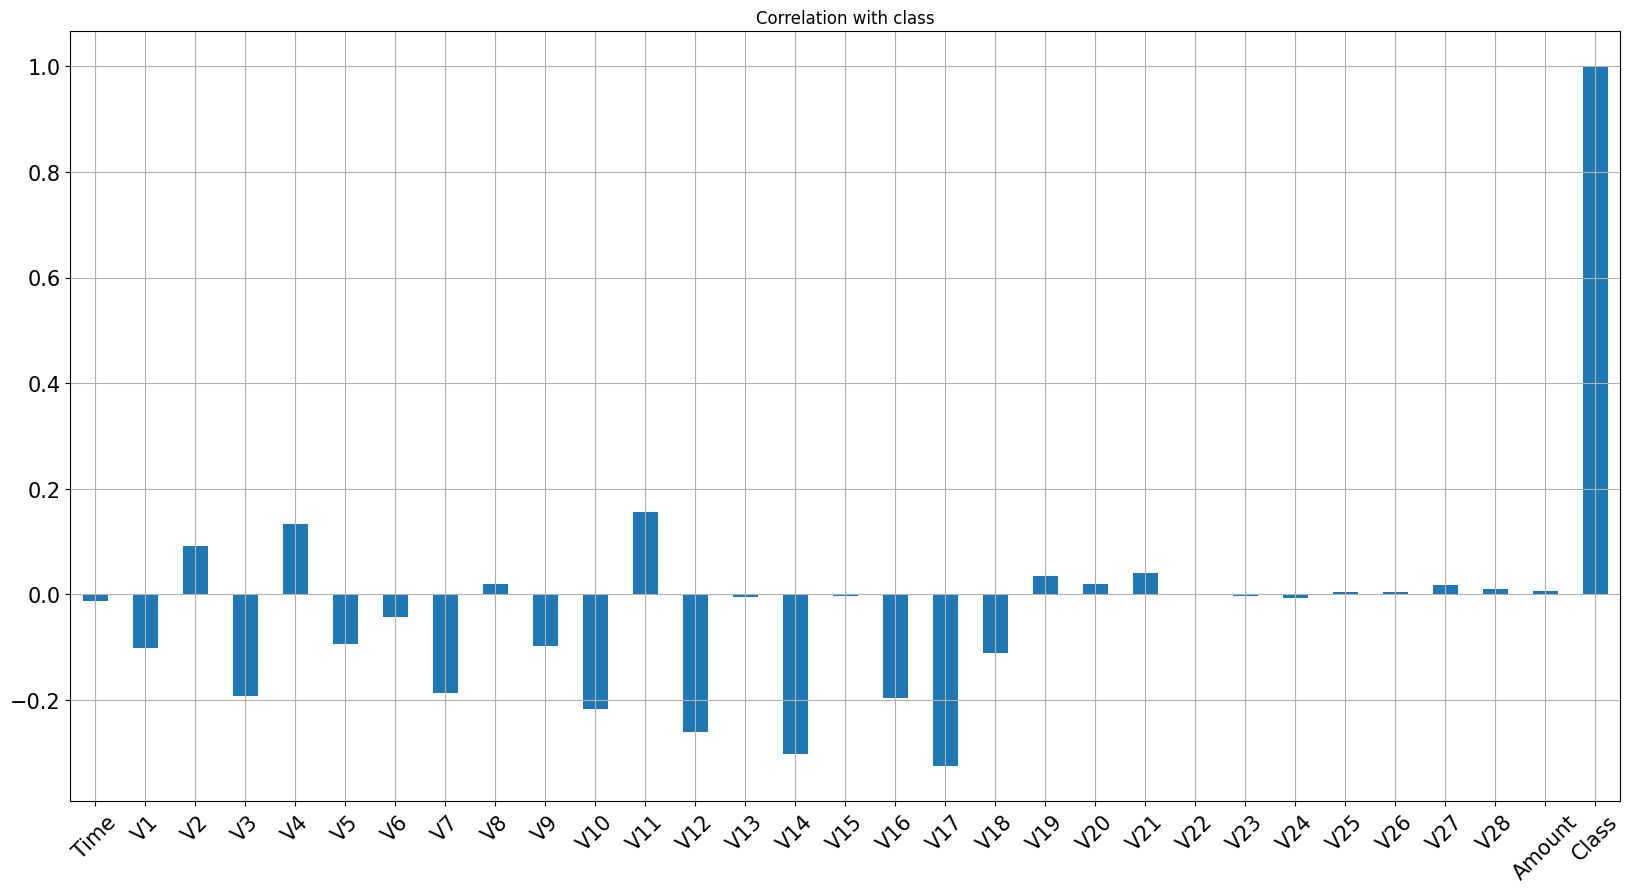

In [ ]:
data.corrwith(data.Class).plot.bar(
        figsize = (20, 10), title = "Correlation with class", fontsize = 15,
        rot = 45, grid = True)

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.isna().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [ ]:
from sklearn.preprocessing import StandardScaler
data['normalizedAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))
data = data.drop(['Amount'],axis=1)

In [ ]:
data = data.drop(['Time'],axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [ ]:
X = data.iloc[:, data.columns != 'Class']
y = data.iloc[:, data.columns == 'Class']

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 29 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   V1                284807 non-null  float64
 1   V2                284807 non-null  float64
 2   V3                284807 non-null  float64
 3   V4                284807 non-null  float64
 4   V5                284807 non-null  float64
 5   V6                284807 non-null  float64
 6   V7                284807 non-null  float64
 7   V8                284807 non-null  float64
 8   V9                284807 non-null  float64
 9   V10               284807 non-null  float64
 10  V11               284807 non-null  float64
 11  V12               284807 non-null  float64
 12  V13               284807 non-null  float64
 13  V14               284807 non-null  float64
 14  V15               284807 non-null  float64
 15  V16               284807 non-null  float64
 16  V17               28

In [ ]:
y.head()

,Class
0,0
1,0
2,0
3,0
4,0


#Model Training

In [ ]:

from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Assuming you have already defined X_train, y_train, X_test, y_test

# Create the Decision Tree model
classifier = DecisionTreeClassifier(random_state=0, criterion='gini', splitter='best', min_samples_leaf=1, min_samples_split=2)
classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = classifier.predict(X_test)

# Calculate evaluation metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Create a DataFrame to store the results
results = pd.DataFrame([['Decision tree', acc, prec, rec, f1]],
                       columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results

,Model,Accuracy,Precision,Recall,F1 Score
0,Decision tree,0.999157,0.773196,0.742574,0.757576


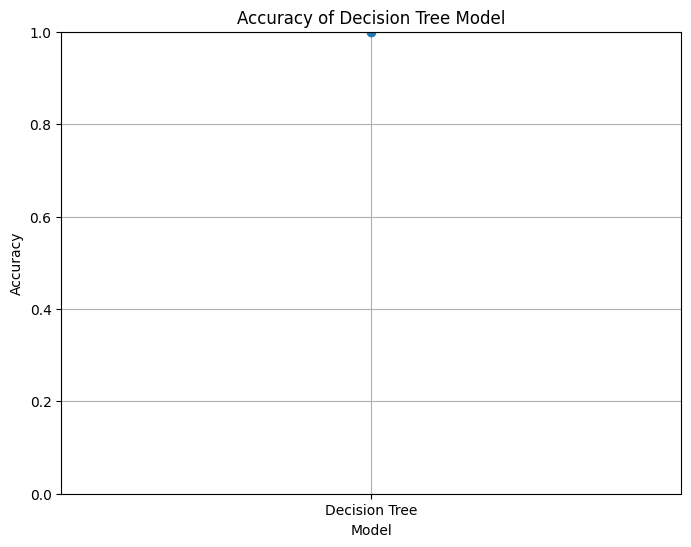

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have stored accuracy values in the 'results' DataFrame

# Extracting accuracy from the DataFrame
accuracy = results['Accuracy'].values[0]

# Plotting the accuracy
plt.figure(figsize=(8, 6))
plt.plot([0], [accuracy], marker='o', linestyle='-')
plt.title('Accuracy of Decision Tree Model')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks([0], ['Decision Tree'])  # Set the tick at position 0 with the label
plt.ylim(0.0, 1.0)  # Setting y-axis limit from 0 to 1
plt.grid(True)
plt.show()


In [ ]:
## Randomforest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
classifier = RandomForestClassifier(random_state = 0, n_estimators = 100,
                                    criterion = 'entropy')
classifier.fit(X_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)



model_results = pd.DataFrame([['Random Forest (n=100)', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

#results = results.append(model_results, ignore_index = True)
model_results

<ipython-input-121-fda2257b3bd5>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)


,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest (n=100),0.999508,0.929412,0.782178,0.849462


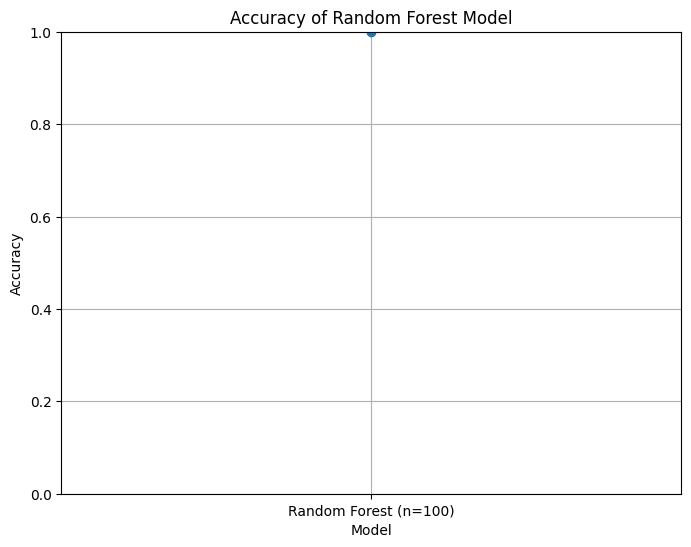

In [ ]:
import matplotlib.pyplot as plt

# Extracting accuracy from the DataFrame
accuracy = model_results['Accuracy'].values[0]

# Plotting the accuracy
plt.figure(figsize=(8, 6))
plt.plot([0], [accuracy], marker='o', linestyle='-')
plt.title('Accuracy of Random Forest Model')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks([0], ['Random Forest (n=100)'])  # Set the tick at position 0 with the label
plt.ylim(0.0, 1.0)  # Setting y-axis limit from 0 to 1
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


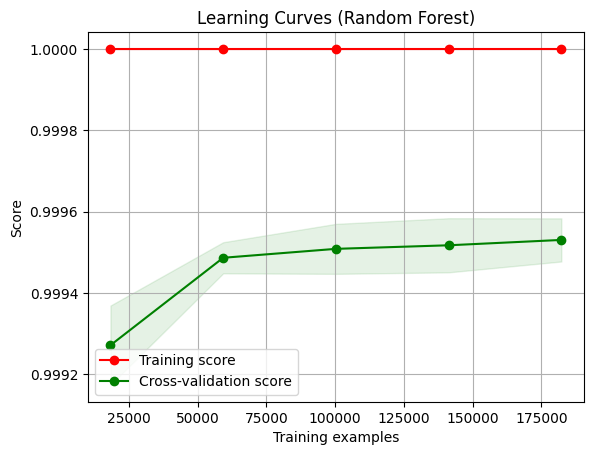

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Usage
title = "Learning Curves (Random Forest)"
plot_learning_curve(classifier, title, X_train, y_train, cv=5, n_jobs=-1)

plt.show()


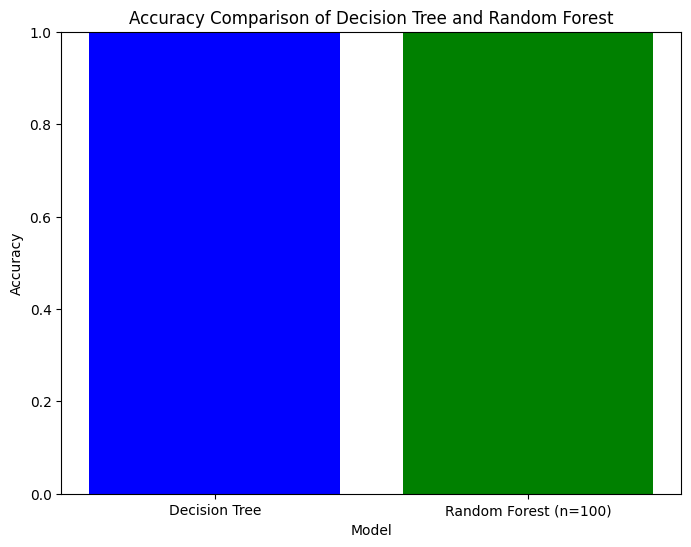

In [ ]:
import matplotlib.pyplot as plt

# Data for plotting
models = ['Decision Tree', 'Random Forest (n=100)']
accuracies = [results['Accuracy'].values[0], model_results['Accuracy'].values[0]]

# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['blue', 'green'])
plt.title('Accuracy Comparison of Decision Tree and Random Forest')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0.0, 1.0)  # Setting y-axis limit from 0 to 1
plt.show()

#GAN

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Load the dataset
df = pd.read_csv('creditcard.csv')

# Data Preprocessing
features = df.drop(['Class'], axis=1)
labels = df['Class']

# Check for NaN values in the dataset
if features.isnull().sum().sum() > 0:
    # Handle missing values
    # For simplicity, you can choose to drop rows with missing values
    features.dropna(inplace=True)
    labels = labels[features.index]  # Align labels with the cleaned features

# Normalize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features.values)

# Split the data into training and testing sets
X_train_real, X_test_real, y_train_real, y_test_real = train_test_split(scaled_features, labels, test_size=0.2, random_state=42)

# Check for NaN values in the split data
if np.isnan(X_train_real).any() or np.isnan(X_test_real).any() or np.isnan(y_train_real).any() or np.isnan(y_test_real).any():
    raise ValueError("NaN values present in the split data. Check data preprocessing steps.")

# Constructing the Neural Network Model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_real.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
history = model.fit(X_train_real, y_train_real, epochs=10, batch_size=64, validation_data=(X_test_real, y_test_real))

# Check for NaN values in the training history
if np.isnan(history.history['loss']).any() or np.isnan(history.history['val_loss']).any():
    raise ValueError("NaN values encountered during training. Check model architecture or learning parameters.")

# Evaluate the model
loss, accuracy = model.evaluate(X_test_real, y_test_real)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')


Epoch 1/10
2453/2453 [==============================] - 6s 2ms/step - loss: 0.0128 - accuracy: 0.9971 - val_loss: 0.0037 - val_accuracy: 0.9991
Epoch 2/10
2453/2453 [==============================] - 7s 3ms/step - loss: 0.0033 - accuracy: 0.9993 - val_loss: 0.0040 - val_accuracy: 0.9988
Epoch 3/10
2453/2453 [==============================] - 5s 2ms/step - loss: 0.0029 - accuracy: 0.9993 - val_loss: 0.0030 - val_accuracy: 0.9994
Epoch 4/10
2453/2453 [==============================] - 7s 3ms/step - loss: 0.0025 - accuracy: 0.9993 - val_loss: 0.0034 - val_accuracy: 0.9995
Epoch 5/10
2453/2453 [==============================] - 5s 2ms/step - loss: 0.0023 - accuracy: 0.9994 - val_loss: 0.0030 - val_accuracy: 0.9994
Epoch 6/10
2453/2453 [==============================] - 6s 2ms/step - loss: 0.0021 - accuracy: 0.9995 - val_loss: 0.0034 - val_accuracy: 0.9995
Epoch 7/10
2453/2453 [==============================] - 5s 2ms/step - loss: 0.0019 - accuracy: 0.9995 - val_loss: 0.0035 - val_accuracy:

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Load the dataset
df = pd.read_csv('creditcard.csv')

# Data Preprocessing
features = df.drop(['Class'], axis=1)
labels = df['Class']

# Normalize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features.values)

# Split the data into training and testing sets
X_train_real, X_test_real, y_train_real, y_test_real = train_test_split(scaled_features, labels, test_size=0.2, random_state=42)



In [ ]:
# Normalize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features.values)

In [ ]:
from keras.layers import Input
from keras.models import Model
latent_dim = 100
feature_dim = scaled_features.shape[1]

def build_generator():
    model = Sequential()
    model.add(Dense(128, activation='relu', input_dim=latent_dim))
    model.add(Dense(feature_dim, activation='tanh'))
    return model

def build_discriminator():
    model = Sequential()
    model.add(Dense(128, activation='relu', input_dim=feature_dim))
    model.add(Dense(1, activation='sigmoid'))
    return model

# Initialize and compile discriminator
discriminator = build_discriminator()
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5), metrics=['accuracy'])

# Build and compile GAN
generator = build_generator()
discriminator.trainable = False
gan_input = Input(shape=(latent_dim,))
fake_feature = generator(gan_input)
gan_output = discriminator(fake_feature)
gan = Model(gan_input, gan_output)
gan.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5))

# Training the GAN
def train_gan(epochs=3000, batch_size=128):
    for epoch in range(epochs):
        # Train discriminator with real data
        idx = np.random.randint(0, X_train_real.shape[0], batch_size)
        real_data = X_train_real[idx]
        d_loss_real = discriminator.train_on_batch(real_data, np.ones((batch_size, 1)))

        # Train discriminator with fake data
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        fake_data = generator.predict(noise)
        d_loss_fake = discriminator.train_on_batch(fake_data, np.zeros((batch_size, 1)))

        # Train generator
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        g_loss = gan.train_on_batch(noise, np.ones((batch_size, 1)))

        if epoch % 100 == 0:
            print(f"Epoch: {epoch} D Loss: {0.5 * np.add(d_loss_real, d_loss_fake)} G Loss: {g_loss}")

train_gan()

4/4 [==============================] - 0s 3ms/step
Epoch: 0 D Loss: [0.80140504 0.41796875] G Loss: 0.7668126821517944
4/4 [==============================] - 0s 3ms/step
Epoch: 100 D Loss: [0.66284105 0.6484375 ] G Loss: 0.7261582016944885
4/4 [==============================] - 0s 3ms/step
Epoch: 200 D Loss: [0.69374791 0.43359375] G Loss: 0.6217857599258423
4/4 [==============================] - 0s 3ms/step
Epoch: 300 D Loss: [0.64850053 0.58984375] G Loss: 0.6335704326629639
4/4 [==============================] - 0s 4ms/step
Epoch: 400 D Loss: [0.65902123 0.5234375 ] G Loss: 0.6042938232421875
4/4 [==============================] - 0s 3ms/step
Epoch: 500 D Loss: [0.64941245 0.60546875] G Loss: 0.6140351295471191
4/4 [==============================] - 0s 3ms/step
Epoch: 600 D Loss: [0.66456306 0.54296875] G Loss: 0.5551055073738098
4/4 [==============================] - 0s 3ms/step
Epoch: 700 D Loss: [0.65081543 0.53125   ] G Loss: 0.6256446838378906
4/4 [=============================

In [ ]:
# Generate synthetic data
noise = np.random.normal(0, 1, (X_train_real.shape[0], latent_dim))
synthetic_data = generator.predict(noise)

4905/4905 [==============================] - 6s 1ms/step


In [ ]:
# Combine synthetic data with real data
synthetic_labels = np.ones(synthetic_data.shape[0])  # Assuming all synthetic samples are fraudulent
combined_features = np.concatenate([X_train_real, synthetic_data])
combined_labels = np.concatenate([y_train_real, synthetic_labels])

# Train a classification model
classifier = Sequential([
    Dense(128, activation='relu', input_dim=feature_dim),
    Dense(1, activation='sigmoid')
])
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
classifier.fit(combined_features, combined_labels, epochs=10, batch_size=32, validation_data=(X_test_real, y_test_real))


Epoch 1/10
9809/9809 [==============================] - 25s 2ms/step - loss: 0.1178 - accuracy: 0.9600 - val_loss: 0.0190 - val_accuracy: 0.9991
Epoch 2/10
9809/9809 [==============================] - 20s 2ms/step - loss: 0.0112 - accuracy: 0.9987 - val_loss: 0.0175 - val_accuracy: 0.9989
Epoch 3/10
9809/9809 [==============================] - 19s 2ms/step - loss: 0.0076 - accuracy: 0.9992 - val_loss: 0.0175 - val_accuracy: 0.9979
Epoch 4/10
9809/9809 [==============================] - 19s 2ms/step - loss: 0.0057 - accuracy: 0.9993 - val_loss: 0.0124 - val_accuracy: 0.9992
Epoch 5/10
9809/9809 [==============================] - 19s 2ms/step - loss: 0.0053 - accuracy: 0.9994 - val_loss: 0.0446 - val_accuracy: 0.9979
Epoch 6/10
9809/9809 [==============================] - 18s 2ms/step - loss: 0.0050 - accuracy: 0.9994 - val_loss: 0.0127 - val_accuracy: 0.9992
Epoch 7/10
9809/9809 [==============================] - 20s 2ms/step - loss: 0.0046 - accuracy: 0.9995 - val_loss: 0.0088 - val_ac

#CNN

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, MaxPooling1D
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('creditcard.csv')

# Data Preprocessing
features = df.drop(['Class'], axis=1)
labels = df['Class']

# Normalize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features.values)

# Split the data into training and testing sets
X_train_real, X_test_real, y_train_real, y_test_real = train_test_split(scaled_features, labels, test_size=0.2, random_state=42)

# Combined data
combined_features = np.concatenate([X_train_real, X_test_real])
combined_labels = np.concatenate([y_train_real, y_test_real])

# Reshape data for CNN
X_train_cnn = np.expand_dims(X_train_real, axis=-1)
X_test_cnn = np.expand_dims(X_test_real, axis=-1)

# Define CNN architecture
model = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the CNN model
history = model.fit(X_train_cnn, y_train_real, epochs=20, batch_size=64, validation_data=(X_test_cnn, y_test_real))



Epoch 1/20
3561/3561 [==============================] - 21s 6ms/step - loss: 0.0069 - accuracy: 0.9984 - val_loss: 0.0047 - val_accuracy: 0.9991
Epoch 2/20
3561/3561 [==============================] - 22s 6ms/step - loss: 0.0036 - accuracy: 0.9993 - val_loss: 0.0030 - val_accuracy: 0.9994
Epoch 3/20
3561/3561 [==============================] - 21s 6ms/step - loss: 0.0033 - accuracy: 0.9994 - val_loss: 0.0031 - val_accuracy: 0.9994
Epoch 4/20
3561/3561 [==============================] - 23s 6ms/step - loss: 0.0031 - accuracy: 0.9993 - val_loss: 0.0027 - val_accuracy: 0.9994
Epoch 5/20
3561/3561 [==============================] - 23s 6ms/step - loss: 0.0029 - accuracy: 0.9994 - val_loss: 0.0034 - val_accuracy: 0.9993
Epoch 6/20
3561/3561 [==============================] - 22s 6ms/step - loss: 0.0029 - accuracy: 0.9994 - val_loss: 0.0025 - val_accuracy: 0.9994
Epoch 7/20
3561/3561 [==============================] - 22s 6ms/step - loss: 0.0027 - accuracy: 0.9994 - val_loss: 0.0027 - val_ac

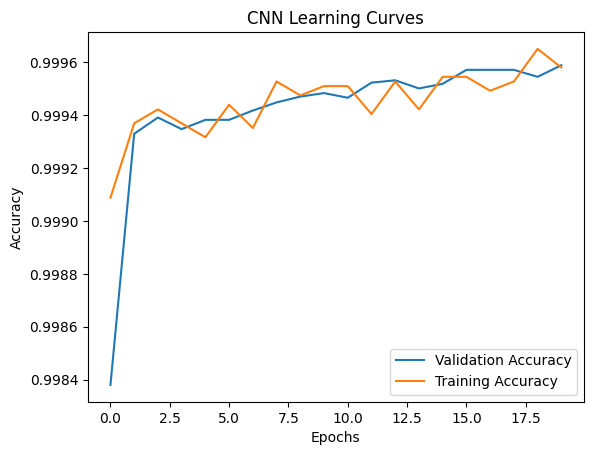

In [ ]:
# Plot learning curves for accuracy
plt.plot(history.history['accuracy'], label='Validation Accuracy')
plt.plot(history.history['val_accuracy'], label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('CNN Learning Curves')
plt.show()


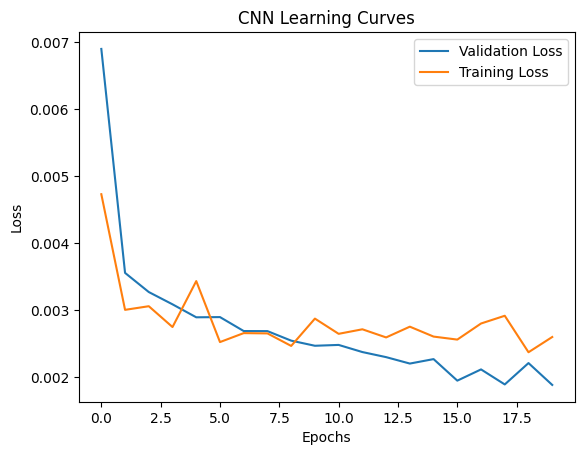

In [ ]:
# Plot learning curves for accuracy
plt.plot(history.history['loss'], label='Validation Loss')
plt.plot(history.history['val_loss'], label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('CNN Learning Curves')
plt.show()


In [ ]:
# Example prediction
new_data = np.random.normal(0, 1, (1, feature_dim))                               # Example new transaction data
fraud_prediction = classifier.predict(new_data) > 1.0
print("Fraudulent" if fraud_prediction else "Not Fraudulent")


1/1 [==============================] - 0s 29ms/step
Not Fraudulent


In [ ]:
new_data = np.random.normal(0, 0, (1, feature_dim))
fraud_prediction = classifier.predict(new_data) > 1.0
print("Fraudulent" if fraud_prediction else "Not Fraudulent")

1/1 [==============================] - 0s 62ms/step
Not Fraudulent


In [ ]:
import numpy as np
num_examples = 4
for _ in range(num_examples):
  new_data = np.random.normal(0, 1, (1, feature_dim))
  fraud_prediction = classifier.predict(new_data) > 0.5
  print("Fraudulent" if fraud_prediction else "Not Fraudulent")


1/1 [==============================] - 0s 19ms/step
Fraudulent
1/1 [==============================] - 0s 19ms/step
Fraudulent
1/1 [==============================] - 0s 25ms/step
Fraudulent
1/1 [==============================] - 0s 21ms/step
Not Fraudulent
